In [37]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import missingno as msno
import plotly.express as px
import matplotlib as mpl

In [2]:
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

In [3]:
df = pd.read_csv(r"C:\Users\Madhuri\Downloads\Centuries of Virat Kohli.csv")
df.head()

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Venue,Column1,Contry,H/A,Date,Result,Format,Man of the Match,Captain,Unnamed: 15
0,116,Out,Australia,6,2,NaN,Adelaide Oval,Adelaide,AUS,Away,24-01-2012,Lost,Test,No,No,NaN
1,103,Out,New Zealand,5,2,NaN,M. Chinnaswamy Stadium,Bangalore,IND,Home,31-08-2012,Won,Test,Yes,No,NaN
2,103,Out,England,5,2,NaN,Vidarbha Cricket Association Stadium,Nagpur,IND,Home,13-12-2012,Drawn,Test,No,No,NaN
3,107,Out,Australia,5,2,NaN,M. A. Chidambaram Stadium,Chennai,IND,Home,22-02-2013,Won,Test,No,No,NaN
4,119,Out,South Africa,4,1,NaN,Wanderers Stadium,Johannesburg,ZAF,Away,18-12-2013,Drawn,Test,No,No,NaN


In [4]:
df.shape

(71, 16)

In [5]:
df.columns

Index(['Score', 'Out/Not Out', 'Against', 'Batting Order', 'Inn.',
       'Strike Rate', 'Venue', 'Column1', 'Contry', 'H/A', 'Date', 'Result',
       'Format', 'Man of the Match', 'Captain', 'Unnamed: 15'],
      dtype='object')

In [6]:
df.columns = ['Score', 'Out/Not Out', 'Against', 'Batting Order', 'Inn.',
       'Strike Rate', 'Stadium','Place','Country','H/A', 'Date', 'Result', 'Format',
       'Man of the Match', 'Captain', 'Unnamed: 14']
df.head()

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Stadium,Place,Country,H/A,Date,Result,Format,Man of the Match,Captain,Unnamed: 14
0,116,Out,Australia,6,2,NaN,Adelaide Oval,Adelaide,AUS,Away,24-01-2012,Lost,Test,No,No,NaN
1,103,Out,New Zealand,5,2,NaN,M. Chinnaswamy Stadium,Bangalore,IND,Home,31-08-2012,Won,Test,Yes,No,NaN
2,103,Out,England,5,2,NaN,Vidarbha Cricket Association Stadium,Nagpur,IND,Home,13-12-2012,Drawn,Test,No,No,NaN
3,107,Out,Australia,5,2,NaN,M. A. Chidambaram Stadium,Chennai,IND,Home,22-02-2013,Won,Test,No,No,NaN
4,119,Out,South Africa,4,1,NaN,Wanderers Stadium,Johannesburg,ZAF,Away,18-12-2013,Drawn,Test,No,No,NaN


Text(0.5, 1.0, 'Missing Values Table')

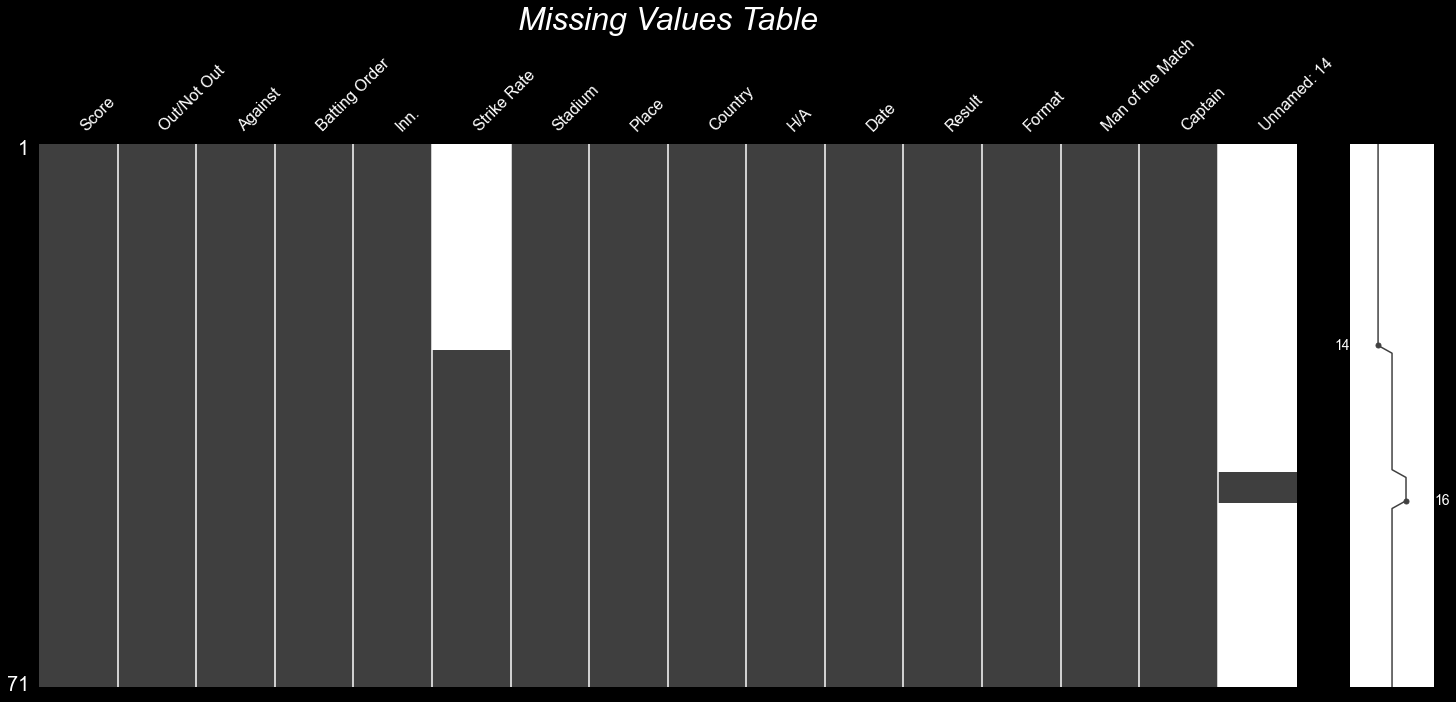

In [7]:
msno.matrix(df)
plt.title('Missing Values Table',fontsize=32, fontstyle= 'oblique')

In [8]:
df.isnull().sum()

Score                0
Out/Not Out          0
Against              0
Batting Order        0
Inn.                 0
Strike Rate         27
Stadium              0
Place                0
Country              0
H/A                  0
Date                 0
Result               0
Format               0
Man of the Match     0
Captain              0
Unnamed: 14         67
dtype: int64

In [9]:
df.drop('Unnamed: 14',axis=1,inplace=True)

In [10]:
df.groupby('Format').mean()

,Score,Batting Order,Inn.,Strike Rate
Format,,,,
ODI,120.813953,3.162791,1.604651,112.02
T20I,122.000000,1.000000,1.000000,200.00
Test,150.555556,4.185185,1.962963,NaN


In [11]:
df['Strike Rate'] = df['Strike Rate'].fillna(0)

In [12]:
df.isnull().sum()

Score               0
Out/Not Out         0
Against             0
Batting Order       0
Inn.                0
Strike Rate         0
Stadium             0
Place               0
Country             0
H/A                 0
Date                0
Result              0
Format              0
Man of the Match    0
Captain             0
dtype: int64

In [13]:
df.duplicated().unique()

array([False])

In [14]:
df['Date'] =  pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [15]:
df.head()

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Stadium,Place,Country,H/A,Date,Result,Format,Man of the Match,Captain
0,116,Out,Australia,6,2,0.0,Adelaide Oval,Adelaide,AUS,Away,2012-01-24,Lost,Test,No,No
1,103,Out,New Zealand,5,2,0.0,M. Chinnaswamy Stadium,Bangalore,IND,Home,2012-08-31,Won,Test,Yes,No
2,103,Out,England,5,2,0.0,Vidarbha Cricket Association Stadium,Nagpur,IND,Home,2012-12-13,Drawn,Test,No,No
3,107,Out,Australia,5,2,0.0,M. A. Chidambaram Stadium,Chennai,IND,Home,2013-02-22,Won,Test,No,No
4,119,Out,South Africa,4,1,0.0,Wanderers Stadium,Johannesburg,ZAF,Away,2013-12-18,Drawn,Test,No,No


In [16]:
df['Format'].unique()

array(['Test', 'ODI', 'T20I'], dtype=object)

In [17]:
df[df['Format']!='Test'][['Score','Strike Rate']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Score,44.0,120.840909,17.743578,100.0,107.0000,116.500,128.2500,183.0
Strike Rate,44.0,114.019545,25.257567,84.9,96.6325,108.935,120.7875,200.0


In [18]:
df[df['Format']=='Test']['Score'].describe().transpose()

count     27.000000
mean     150.555556
std       48.817031
min      103.000000
25%      106.000000
50%      139.000000
75%      184.500000
max      254.000000
Name: Score, dtype: float64

<AxesSubplot:xlabel='Batting Order', ylabel='Score'>

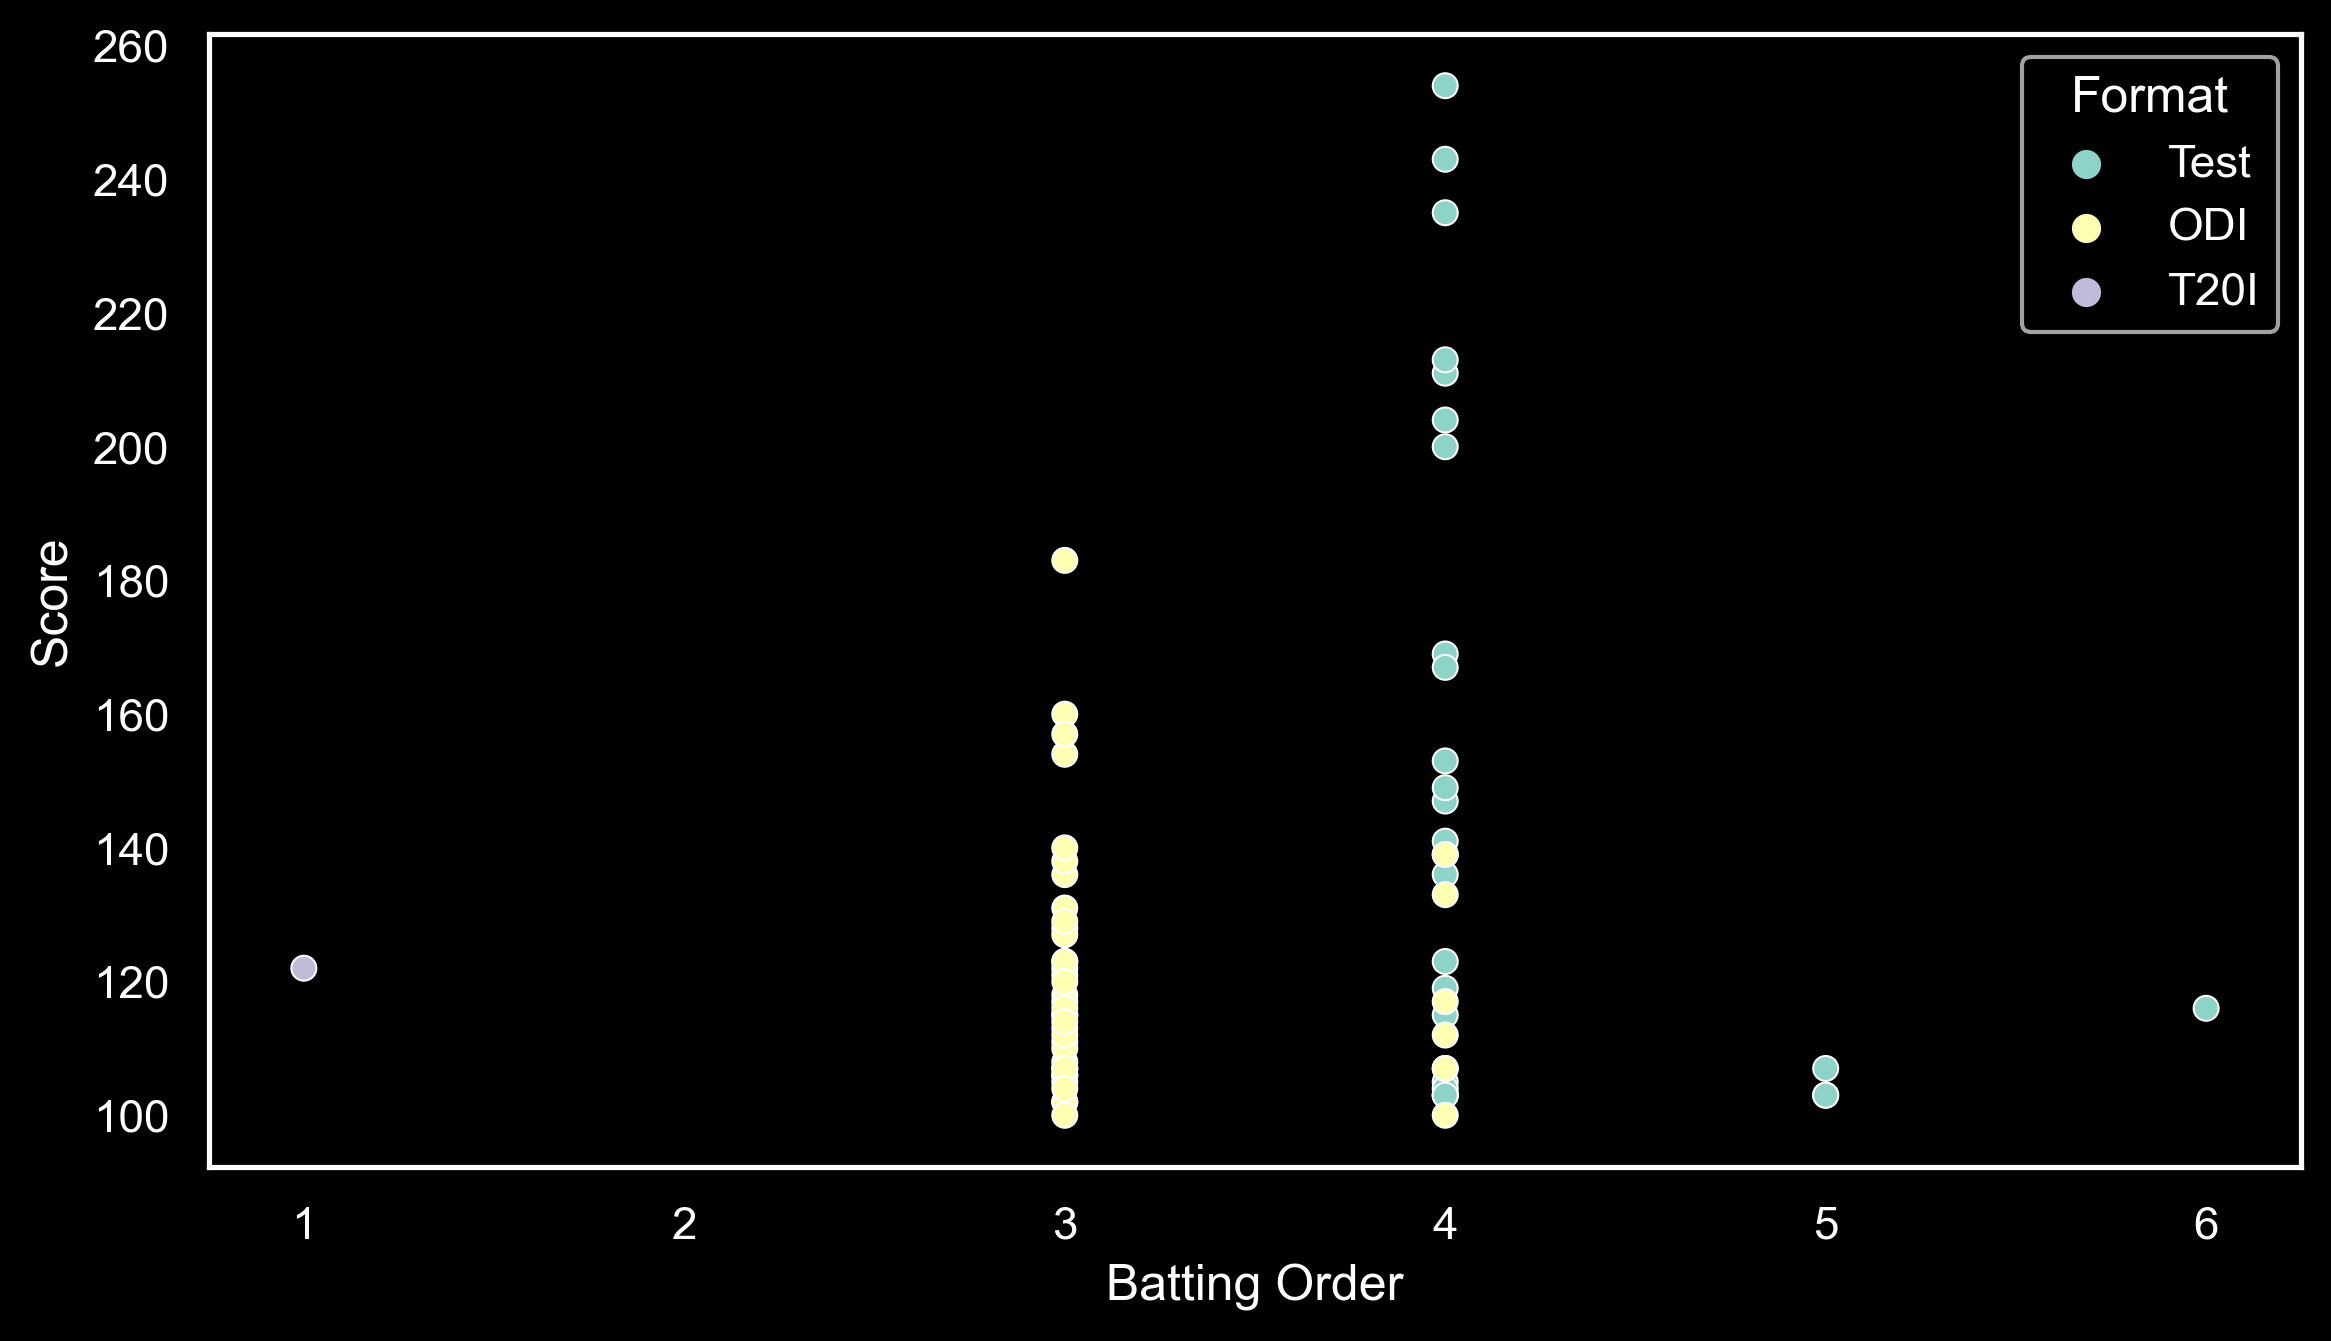

In [19]:
plt.figure(dpi=300,figsize=(9,5))
sns.scatterplot(x='Batting Order',y='Score',data=df,hue='Format')

In [20]:
df['Date'].duplicated().unique()

array([False,  True])

In [21]:
df['Date'].value_counts()

2014-12-09    2
2012-01-24    1
2014-10-17    1
2016-10-23    1
2016-01-20    1
             ..
2011-02-19    1
2011-09-16    1
2011-10-17    1
2011-12-02    1
2022-09-08    1
Name: Date, Length: 70, dtype: int64

In [22]:
df[df['Date']=='2014-12-09']

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Stadium,Place,Country,H/A,Date,Result,Format,Man of the Match,Captain
6,115,Out,Australia,4,2,0.0,Adelaide Oval,Adelaide,AUS,Away,2014-12-09,Lost,Test,No,Yes
7,141,Out,Australia,4,4,0.0,Adelaide Oval,Adelaide,AUS,Away,2014-12-09,Lost,Test,No,Yes


In [24]:
%matplotlib inline
Country = df['Country'].value_counts()
fig = px.choropleth(locations=Country.index,
                    color=Country.values,
                    color_continuous_scale=px.colors.sequential.Peach,
                    template='plotly_dark',
                    title = 'countries')
fig.add_scattergeo(
    locations=Country.index,
    text= Country.values, 
    mode='text')
fig.update_layout(font = dict(size= 10, family="Franklin Gothic"))

In [35]:
fig = px.scatter(df, x="Score", y="Format", size="Score", color="Inn.",
           hover_name="Result", size_max=50)
fig.show()